In [26]:
import numpy as np
import torch 
import matplotlib.pyplot as plt

import sys 
sys.path.append("..") 
from source import ricker
from forward import acoustic2d, gen_data 
from model import marmousi, bp2004

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
# Configuration
h = 10.0
dt = 0.001
nt = 1000
f0 = 10.0

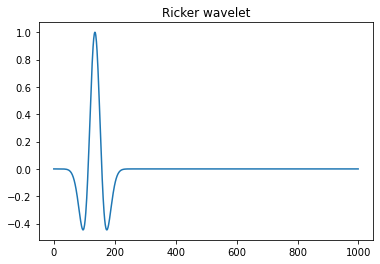

In [5]:
ts = np.arange(nt) * dt
source_time = ricker(ts, f0)
plt.plot(source_time)
plt.title("Ricker wavelet")
source_time = torch.tensor(source_time).float()

Homogenous model

In [13]:
%%time
model = torch.ones(101, 101) * 1500
model = model.float().to(device)
sources_x = torch.tensor([[50, 50]]).int()
P = acoustic2d(model, source_time, sources_x, h, dt)
P = P.squeeze().numpy()

CPU times: user 1.81 s, sys: 144 ms, total: 1.96 s
Wall time: 365 ms


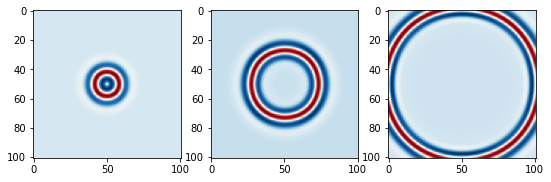

In [15]:
time_to_plot = [200, 300, 500]
fig = plt.figure(figsize=(9, 6))
ax1 = fig.add_subplot(131)
ax1.imshow(P[time_to_plot[0]], cmap="RdBu")
ax2 = fig.add_subplot(132)
ax2.imshow(P[time_to_plot[1]], cmap="RdBu")
ax3 = fig.add_subplot(133)
ax3.imshow(P[time_to_plot[2]], cmap="RdBu")

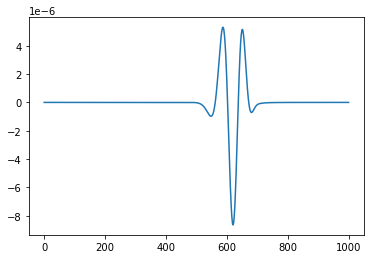

In [21]:
plt.plot(P[:, 0, 0])

Marmosi model

In [19]:
%%time
model = marmousi()
model = torch.tensor(model).float().to(device)
sources_x = torch.tensor([[50, 50]]).int()
P = acoustic2d(model, source_time, sources_x, h, dt)
P = P.squeeze().numpy()

CPU times: user 1.82 s, sys: 120 ms, total: 1.94 s
Wall time: 334 ms


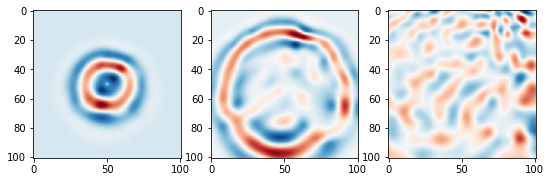

In [20]:
time_to_plot = [200, 300, 500]
fig = plt.figure(figsize=(9, 6))
ax1 = fig.add_subplot(131)
ax1.imshow(P[time_to_plot[0]], cmap="RdBu")
ax2 = fig.add_subplot(132)
ax2.imshow(P[time_to_plot[1]], cmap="RdBu")
ax3 = fig.add_subplot(133)
ax3.imshow(P[time_to_plot[2]], cmap="RdBu")

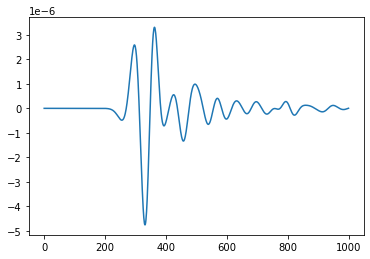

In [21]:
plt.plot(P[:, 60, -1])

BP2004 model

In [22]:
%%time
model = bp2004()
model = torch.tensor(model).float().to(device)
sources_x = torch.tensor([[50, 50]]).int()
P = acoustic2d(model, source_time, sources_x, h, dt)
P = P.squeeze().numpy()

CPU times: user 1.84 s, sys: 162 ms, total: 2.01 s
Wall time: 435 ms


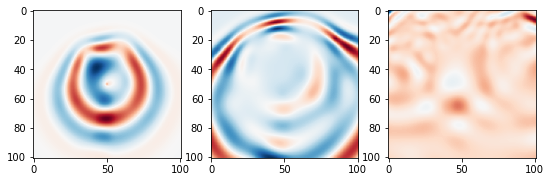

In [23]:
time_to_plot = [200, 300, 500]
fig = plt.figure(figsize=(9, 6))
ax1 = fig.add_subplot(131)
ax1.imshow(P[time_to_plot[0]], cmap="RdBu")
ax2 = fig.add_subplot(132)
ax2.imshow(P[time_to_plot[1]], cmap="RdBu")
ax3 = fig.add_subplot(133)
ax3.imshow(P[time_to_plot[2]], cmap="RdBu")

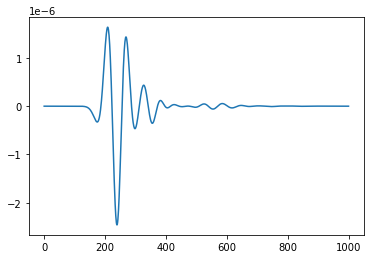

In [25]:
plt.plot(P[:, 90, 50])